In [67]:
from analysis_script import *

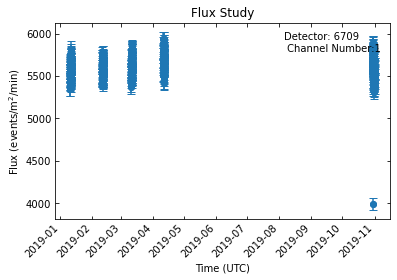

In [68]:
flux_0, error_0 = scatter_flux('0_angle_data.csv')
remove_outlier(flux_0, error_0)
flux_0 = [float(f) for f in flux_0]
error_0 = [float(f) for f in error_0]

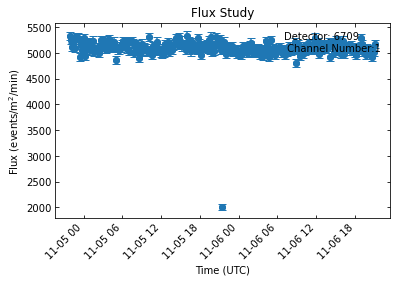

In [69]:
flux_15, error_15 = scatter_flux('15_angle_data.csv')
remove_outlier(flux_15, error_15)
flux_15 = [float(f) for f in flux_15]
error_15 = [float(f) for f in error_15]

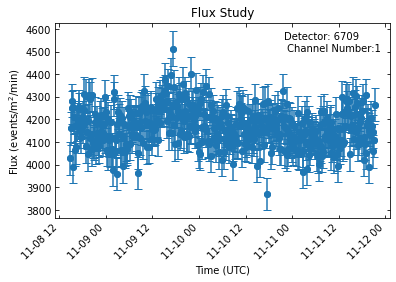

In [70]:
flux_30, error_30 = scatter_flux('30_angle_data_fix.csv')
remove_outlier(flux_30, error_30)
flux_30 = [float(f) for f in flux_30]
error_30 = [float(f) for f in error_30]

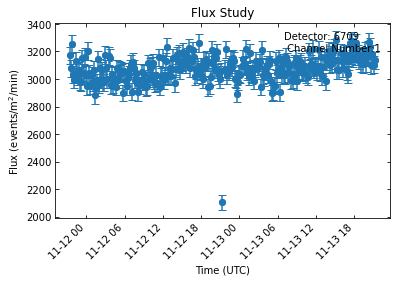

In [71]:
flux_45, error_45 = scatter_flux('45_angle_data.csv')
remove_outlier(flux_45, error_45)
flux_45 = [float(f) for f in flux_45]
error_45 = [float(f) for f in error_45]

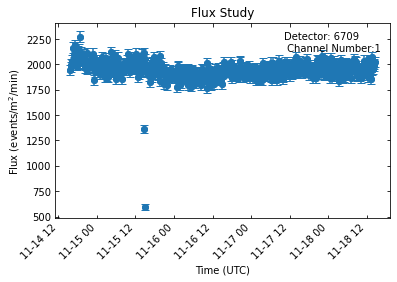

In [72]:
flux_60, error_60 = scatter_flux('60_angle_data.csv')
remove_outlier(flux_60, error_60)
flux_60 = [float(f) for f in flux_60]
error_60 = [float(f) for f in error_60]

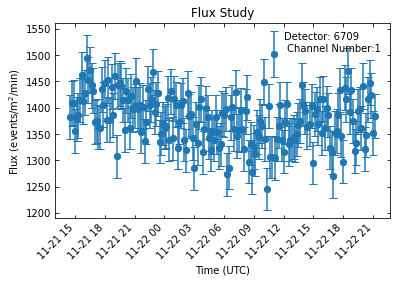

In [73]:
flux_75, error_75 = scatter_flux('75_angle_data_fix.csv')
remove_outlier(flux_75, error_75)
flux_75 = [float(f) for f in flux_75]
error_75 = [float(f) for f in error_75]

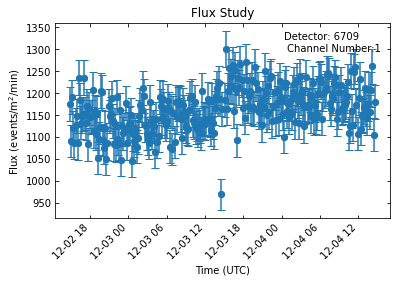

In [74]:
flux_90, error_90 = scatter_flux('90_angle_data.csv')
remove_outlier(flux_90, error_90)
flux_90 = [float(f) for f in flux_90]
error_90 = [float(f) for f in error_90]

In [75]:
#flux_all, error_all = scatter_flux('all_angles.csv')

In [76]:
#convert to float
flux_all = []
for f in flux_0:
    flux_all.append(float(f))
for f in flux_15:
    flux_all.append(float(f))
for f in flux_30:
    flux_all.append(float(f))
for f in flux_45:
    flux_all.append(float(f))
for f in flux_60:
    flux_all.append(float(f))
for f in flux_75:
    flux_all.append(float(f))
# for f in flux_90:
#     flux_all.append(float(f))
    
error_all = []
for f in error_0:
    error_all.append(float(f))
for f in error_15:
    error_all.append(float(f))
for f in error_30:
    error_all.append(float(f))
for f in error_45:
    error_all.append(float(f))
for f in error_60:
    error_all.append(float(f))
for f in error_75:
    error_all.append(float(f))
# for f in error_90:
#     error_all.append(float(f))

### Fit data

I: 5361.99300 n: 1.39060
A: 4338.98924 B: 1.04729 C: 0.06781 D: 1287.69190
f: 5368.09444 m: 2.41199
std of n:  0.006573464782412613
percent error:  30.47003739042644
std of Schwerdt:  0.0031108007710037356
std of Shukla:  0.006446505242045328


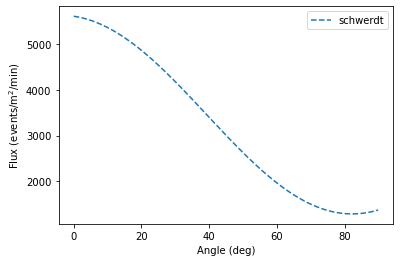

In [77]:
from scipy.optimize import curve_fit

angles =  []

z = 0
while z < len(flux_0):
    angles.append(0)
    z += 1
f = 0
while f < len(flux_15):
    angles.append(15)
    f += 1
t = 0
while t < len(flux_30):
    angles.append(30)
    t += 1
fo = 0
while fo < len(flux_45):
    angles.append(45)
    fo += 1
s = 0
while s < len(flux_60):
    angles.append(60)
    s += 1
se = 0
while se < len(flux_75):
    angles.append(75)
    se += 1
ni = 0
# while ni < len(flux_90):
#     angles.append(90)
#     ni += 1

rad_angles = [a * (np.pi / 180) for a in angles]
rad_angles = np.array(rad_angles)

def objective(angle, I, n):
    return I * (np.cos(angle)**(n))

def schwerdt(angle, A, B, C, D):
    return (A * (np.cos(B*angle + C))**2) + D

def shukla(angle, f, m):
    return f * (np.sqrt(30276*np.cos(angle)**2 + 349) - 174*np.cos(angle))**(-1*m+1)

# def mod_schwerdt(angle,E,F,G,H,e):
#     #return E + F * (np.cos(angle)**(e)) 
#     return (E * (np.cos(F*angle + G))**e) + H

popt, var = curve_fit(objective, rad_angles, flux_all, p0=[4266, 2], sigma = error_all, maxfev = 8000)
I, n = popt
print('I: %.5f n: %.5f' % (I, n))

mod_popt, mod_var = curve_fit(schwerdt, rad_angles, flux_all, p0=[2500, 1, 0, 500], sigma = error_all, maxfev = 8000)#[1000, 0, 4266]
A, B, C, D = mod_popt
print('A: %.5f B: %.5f C: %.5f D: %.5f' % (A, B, C, D))

s_popt, s_var = curve_fit(shukla, rad_angles, flux_all, p0=[4266, 3], sigma = error_all, maxfev = 8000)
f, m = s_popt
print('f: %.5f m: %.5f' % (f,m))

# mod_schwerdt_popt, mod_schwerdt_var = curve_fit(mod_schwerdt, rad_angles, flux_all, p0=[2500, 1, 0, 500, 2], sigma = error_all, maxfev = 8000)#[1208, 4266, 2]
# #E, F, e = mod_schwerdt_popt
# #print('E: %.5f F: %.5f e: %.5f' % (E,F,e))
# E,F,G,H,e = mod_schwerdt_popt
# print('E: %.5f F: %.5f G: %.5f H: %.5f e: %.5f' % (E,F,G,H,e))

#covariance matrix
#print(var)

#one std errors of parameters
perr = np.sqrt(np.diag(var))
#print('std of n: ', perr[2])
print('std of n: ', perr[1])

d = abs((n - 2) / 2)
print('percent error: ', d*100)

mod_perr = np.sqrt(np.diag(mod_var))
print('std of Schwerdt: ', mod_perr[2])

shukla_perr = np.sqrt(np.diag(s_var))
print('std of Shukla: ', shukla_perr[1])

# mod_mod_schwerdt = np.sqrt(np.diag(mod_schwerdt_var))
# print('std of e: ', mod_mod_schwerdt[2])
#mod_d = abs((p - 2) / 2)
#print('percent error: ', mod_d*100)

fit = objective(rad_angles, I, n)
schwerdt_fit = schwerdt(rad_angles, A, B, C, D)
ideal = objective(rad_angles, I, 2)
s_fit = shukla(rad_angles, f, m)
#mod_schwerdt_fit = (rad_angles, E, F, G,H,e)

x = np.arange(0, 90, 0.1)
#y_ideal = A + B * (np.cos(x * np.pi/180)**2)
y_ideal = I * (np.cos(x * np.pi/180)**2)
#y_fit = A + B * (np.cos(x * np.pi/180)**n)
y_fit = I * (np.cos(x * np.pi/180)**n)
y_schwerdt = (A * np.cos(B*(x*np.pi/180) + C)**2) + D
y_s = f * (np.sqrt(30276*np.cos(x * np.pi/180)**2 + 349) - 174*np.cos(x * np.pi/180))**(-1*(m-1))
#y_mod_schwerdt_fit = (E * np.cos((F*x * np.pi/180) + G)**(e)) + H

#plt.plot(x, y_fit, linestyle='dashed', label='cos$^{%5.2f}$' %n)
#plt.plot(x,y_ideal, c='r', label='cos$^2$')
#plt.plot(x, y_mod_schwerdt_fit, linestyle='dashed', label='schwerdt_mod')
#plt.plot(x, y_s, linestyle='dashed', label='shukla')
plt.plot(x, y_schwerdt, linestyle='dashed', label='schwerdt')

plt.xlabel('Angle (deg)')
plt.ylabel('Flux (events/m$^2$/min)')
plt.legend()
plt.show()

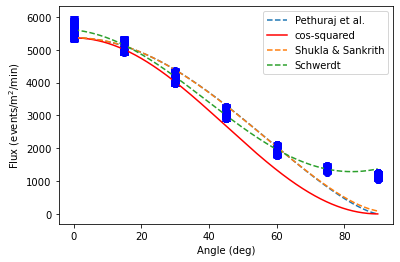

In [78]:
angles =  [0, 15, 30, 45, 60, 75, 90]

# remove_outlier(flux_0, error_0)
# remove_outlier(flux_15, error_15)
# remove_outlier(flux_30, error_30)
# remove_outlier(flux_45, error_45)
# remove_outlier(flux_60, error_60)
# remove_outlier(flux_75, error_75)
# remove_outlier(flux_90, error_90)

fluxs =  [flux_0, flux_15, flux_30, flux_45,  flux_60,  flux_75,  flux_90] 
errs = [error_0, error_15, error_30, error_45, error_60, error_75, error_90]

for xe, ye, ee in zip(angles, fluxs, errs):
    plt.scatter([xe] * len(ye), ye, color='blue')
    plt.errorbar([xe] * len(ye), ye, yerr=ee, fmt='o', capsize=4, color='blue')

#get x and y data
x = np.arange(0, 90, 0.1)
#y_ideal = A + B * (np.cos(x * np.pi/180)**2)
y_ideal = I * (np.cos(x * np.pi/180)**2)
#y_fit = A + B * (np.cos(x * np.pi/180)**n)
y_fit = I * (np.cos(x * np.pi/180)**n)
#y_mod = A + B * (np.cos(x * np.pi/180)**p)
y_s = f * (np.sqrt(30276*np.cos(x * np.pi/180)**2 + 349) - 174*np.cos(x * np.pi/180))**(-1*(m-1))
y_schwerdt = (A * np.cos(B*(x*np.pi/180) + C)**2) + D

#plot model and fit
plt.plot(x, y_fit, linestyle='dashed', label='Pethuraj et al.' %n)
plt.plot(x,y_ideal, c='r', label='cos-squared')
#plt.plot(x, y_mod, linestyle='dashed', label='n = %5.2f' %p)
plt.plot(x, y_s, linestyle='dashed', label='Shukla & Sankrith')
plt.plot(x, y_schwerdt, linestyle='dashed', label='Schwerdt')


plt.xlabel('Angle (deg)')
plt.ylabel('Flux (events/m$^2$/min)')
plt.legend()
plt.show()

### Get R$^2$ coefficient

In [79]:
from sklearn.metrics import r2_score
y_pred = schwerdt(rad_angles, A,B,C,D)
#y_pred = ideal
r2_score(flux_all, y_pred)



0.9965552913084054

### Chi-Squared/Reduced Chi-Squared 

In [80]:
flux_all = np.array(flux_all)
error_all = np.array(error_all)

diff_fit = (fit - flux_all)**2
chi_sqr_fit = np.sum(diff_fit / error_all**2)
#print("Chi-squared Fit: ", chi_sqr_fit)
dof_fit = len(flux_all) - 2
print("Pethuraj Reduced Chi-squared Fit:", chi_sqr_fit / dof_fit)

diff_shukla = (s_fit - flux_all)**2
chi_sqr_shukla = np.sum(diff_shukla / error_all**2)
dof_shukla = len(flux_all) - 2
print('Reduced Chi-squared Shukla:', chi_sqr_shukla / dof_shukla)

diff_schwerdt = (schwerdt_fit - flux_all)**2
chi_sqr_schwerdt = np.sum(diff_schwerdt / error_all**2)
#print("Chi-squared Schwerdt: ", chi_sqr_schwerdt)
dof_schwerdt = len(flux_all) - 4
print("Reduced Chi-squared Schwerdt:", chi_sqr_schwerdt / dof_schwerdt)

diff_cos = (ideal - flux_all)**2
chi_sqr_cos = np.sum(diff_cos / error_all**2)
dof_cos = len(flux_all) - 1
print('Reduced Chi-squared cos-squared:', chi_sqr_cos / dof_cos)

Pethuraj Reduced Chi-squared Fit: 21.349901860025437
Reduced Chi-squared Shukla: 20.069744493989194
Reduced Chi-squared Schwerdt: 1.7488951950777787
Reduced Chi-squared cos-squared: 85.05190126867394
